### Step1: Importing the Necessary libraries and reading our data

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split  
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers 
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
df1 = pd.read_csv('california_housing_train.csv')
df2 = pd.read_csv('california_housing_test.csv')
frames = [df1,df2]
df = pd.concat(frames,ignore_index=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
19995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
19996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
19997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
19998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [3]:
df.shape

(20000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20000 non-null  float64
 1   latitude            20000 non-null  float64
 2   housing_median_age  20000 non-null  float64
 3   total_rooms         20000 non-null  float64
 4   total_bedrooms      20000 non-null  float64
 5   population          20000 non-null  float64
 6   households          20000 non-null  float64
 7   median_income       20000 non-null  float64
 8   median_house_value  20000 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Step2: Data Cleaning 
#### Checking if our dataset has null or duplicated values or outliers

In [5]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [6]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='median_house_value'>

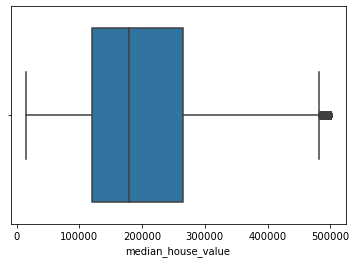

In [7]:
sns.boxplot(x=df['median_house_value'])

#### We noticd we have outliers values so we need to Remove it from our dataset 

In [8]:
df_outliers= df[(np.abs(stats.zscore(df['median_house_value'])) < 1)]
print(f'We will lose {((df.shape[0] - df_outliers.shape[0])/df.shape[0])*100}% of our data if we drop the outliers')

We will lose 29.885% of our data if we drop the outliers


In [9]:
df_outliers.shape

(14023, 9)

In [10]:
df_outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16,-114.65,33.60,28.0,1678.0,322.0,666.0,256.0,2.9653,94900.0
25,-115.32,32.82,34.0,591.0,139.0,327.0,89.0,3.6528,100000.0
32,-115.39,32.76,16.0,1136.0,196.0,481.0,185.0,6.2558,146300.0
33,-115.40,32.86,19.0,1087.0,171.0,649.0,173.0,3.3182,113800.0
34,-115.40,32.70,19.0,583.0,113.0,531.0,134.0,1.6838,95800.0
...,...,...,...,...,...,...,...,...,...
19991,-117.17,34.28,13.0,4867.0,718.0,780.0,250.0,7.1997,253800.0
19994,-117.93,33.86,35.0,931.0,181.0,516.0,174.0,5.5867,182500.0
19995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
19996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0


<AxesSubplot:xlabel='median_house_value'>

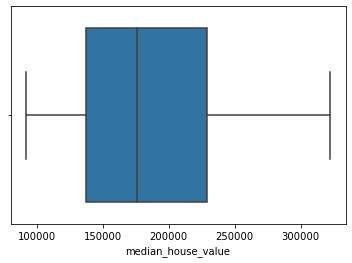

In [11]:
sns.boxplot(x=df_outliers['median_house_value'])

In [12]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-119.566172,35.626750,28.627750,2637.051550,537.991800,1425.557650,499.525450,3.872132,207082.716750
std,2.003609,2.136141,12.582229,2176.314757,420.631119,1131.048487,381.729517,1.900356,115557.055856
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1451.000000,296.000000,788.000000,280.000000,2.562500,119800.000000
50%,-118.490000,34.250000,29.000000,2126.000000,434.000000,1166.000000,409.000000,3.536000,179800.000000
75%,-118.000000,37.710000,37.000000,3149.000000,647.000000,1724.000000,604.000000,4.745325,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Step3:  **Predictive Analysis** 

Text(0.5, 1.0, 'Heat Map for our Data')

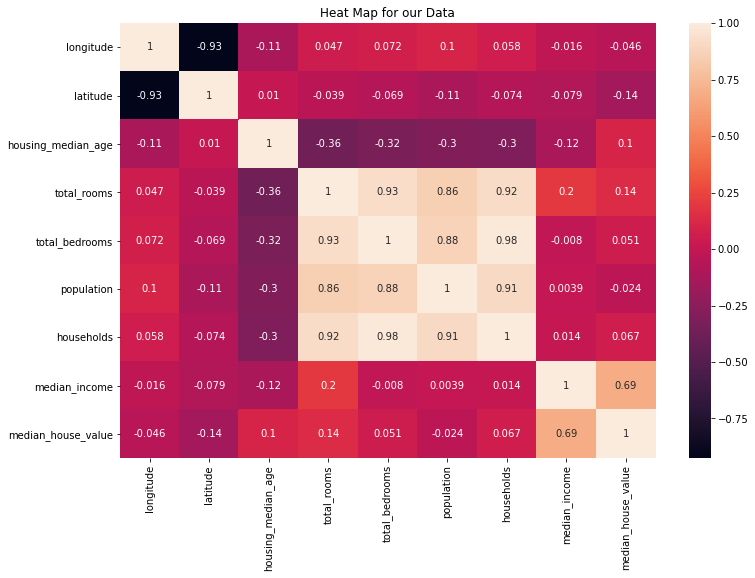

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True).set_title("Heat Map for our Data")

#### We noticed a strong correlation between "median_income" and "median_house_value"feature. We'll explore this features further.

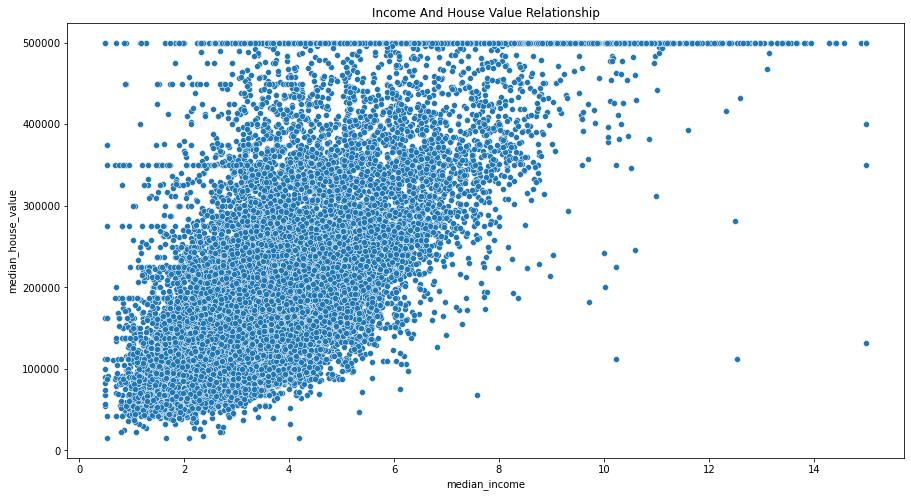

In [14]:
plt.figure(figsize=(15,8))
ax= sns.scatterplot(data=df, x="median_income", y="median_house_value").set_title("Income And House Value Relationship")

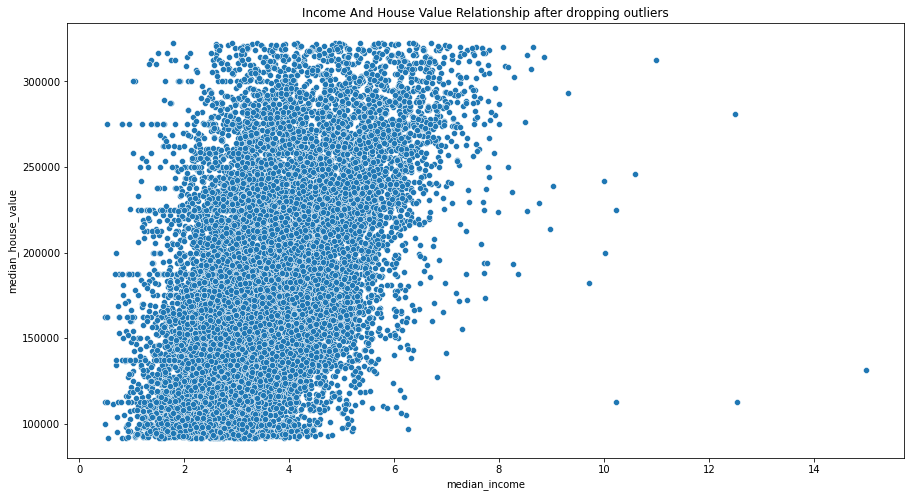

In [15]:
plt.figure(figsize=(15,8))
ax= sns.scatterplot(data=df_outliers, x="median_income", y="median_house_value").set_title("Income And House Value Relationship after dropping outliers")

Text(0.5, 1.0, 'longitude and latitude  relationship with house value')

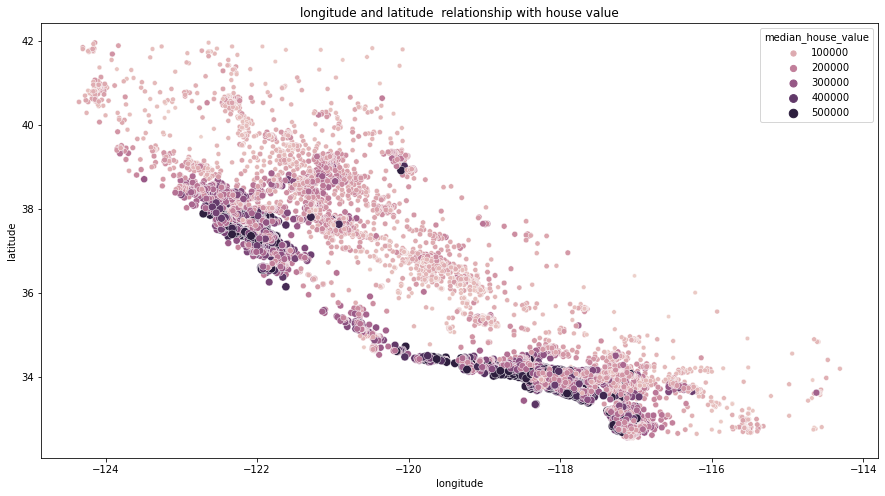

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="longitude", y="latitude", hue=df["median_house_value"], size=df["median_house_value"]).set_title("longitude and latitude  relationship with house value")

Text(0.5, 1.0, 'longitude and latitude  relationship with house value after dropping outliers')

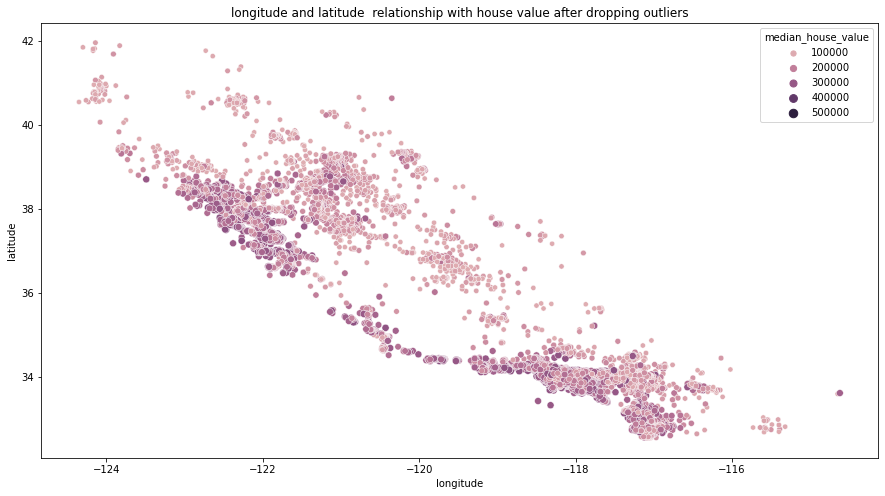

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_outliers, x="longitude", y="latitude", hue=df["median_house_value"], size=df["median_house_value"]).set_title("longitude and latitude  relationship with house value after dropping outliers")

#### We noticed that there is a specific area where the price is high 

# Step4: Modeling And Splitting Our Data 

In [20]:
X1 = df.drop(columns=['median_house_value'])
X2 = df_outliers.drop(columns=['median_house_value'])
X1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
19995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
19996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
19997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895
19998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708


In [21]:
Y1 =df[['median_house_value']]
Y2 =df_outliers[['median_house_value']]
Y1

,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0
...,...
19995,225000.0
19996,237200.0
19997,62000.0
19998,162500.0


### Splitting  the dataset into train and test set

In [22]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, Y1, train_size=0.7)
X_train2, X_test2, y_train2, y_test2 = train_test_split( X2, Y2, train_size=0.7)

In [108]:
input_shape= [X_train1.shape[1]]
input_shape

[8]

creating the model with 5 layers 

In [133]:
model1 = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(200, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(200, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(200, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(200, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='relu')
           ])

#optimizer=keras.optimizers.RMSprop(0.001)
model1.compile(optimizer='adam',loss='mean_squared_error',metrics='mean_squared_error')

In [134]:
model1.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_33 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 dense_124 (Dense)           (None, 200)               1800      
                                                                 
 batch_normalization_34 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 dropout_36 (Dropout)        (None, 200)               0         
                                                                 
 dense_125 (Dense)           (None, 200)               40200     
                                                                 
 batch_normalization_35 (Bat  (None, 200)            

### Fitting all train variables to the model

In [ ]:
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3, min_delta=0.001, restore_best_weights=True )
history= model1.fit(X_train1,y_train1, validation_data=(X_test1, y_test1),epochs=500,batch_size=256, callbacks=[callback], verbose=0 )

Minimum validation loss: 4464536576.0


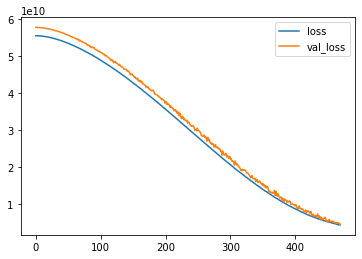

In [123]:
history1_df= pd.DataFrame(history.history)
history1_df.loc[:, ['loss','val_loss']].plot();
print("Minimum validation loss: {}".format(history1_df['val_loss'].min()))

mean squared error score

In [26]:
y_predict1= model1.predict(X_test1)

In [27]:
y_predict1

array([[150667.14],
       [209329.06],
       [167804.33],
       ...,
       [137825.56],
       [250859.97],
       [174082.53]], dtype=float32)

In [28]:
y_test1.values

array([[112500.],
       [185600.],
       [237500.],
       ...,
       [171300.],
       [307200.],
       [285500.]])

Text(0.5, 1.0, 'Neural Network Model Without Removing Outliers Values ')

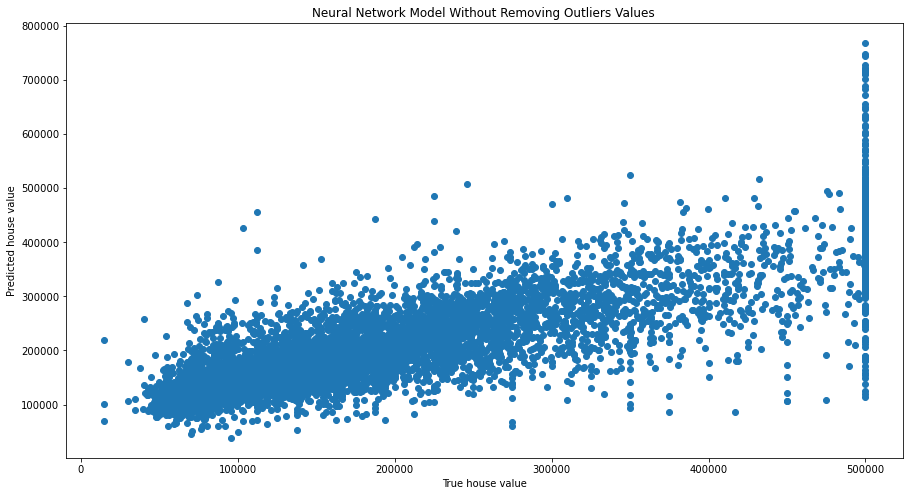

In [37]:
plt.figure(figsize=(15,8 ))
plt.scatter(y_test1.values, y_predict1)
plt.xlabel('True house value')
plt.ylabel('Predicted house value')
plt.title('Neural Network Model Without Removing Outliers Values ')

### Now we will create another model without outliers data to see if it's worthy to drop that rows 

In [29]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(8, activation='relu', input_shape=(8,)))
model2.add(keras.layers.Dense(8, activation='relu'))
model2.add(keras.layers.Dense(4, activation='relu'))
model2.add(keras.layers.Dense(8, activation='relu'))
model2.add(keras.layers.Dense(1))
#optimizer=keras.optimizers.RMSprop(0.001)
model2.compile(optimizer='adam',loss='mean_squared_error',metrics='mean_squared_error')

In [30]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model2.fit(X_train2,y_train2,epochs=500,batch_size=20, callbacks=[callback])

Epoch 1/500
491/491 [==============================] - 1s 2ms/step - loss: 26294417408.0000 - mean_squared_error: 26294417408.0000
Epoch 2/500
491/491 [==============================] - 1s 2ms/step - loss: 14364530688.0000 - mean_squared_error: 14364530688.0000
Epoch 3/500
491/491 [==============================] - 1s 1ms/step - loss: 13860023296.0000 - mean_squared_error: 13860023296.0000
Epoch 4/500
491/491 [==============================] - 1s 2ms/step - loss: 13384047616.0000 - mean_squared_error: 13384047616.0000
Epoch 5/500
491/491 [==============================] - 1s 1ms/step - loss: 12819291136.0000 - mean_squared_error: 12819291136.0000
Epoch 6/500
491/491 [==============================] - 1s 1ms/step - loss: 12172402688.0000 - mean_squared_error: 12172402688.0000
Epoch 7/500
491/491 [==============================] - 1s 1ms/step - loss: 11351157760.0000 - mean_squared_error: 11351157760.0000
Epoch 8/500
491/491 [==============================] - 1s 1ms/step - loss: 10207814

Epoch 64/500
491/491 [==============================] - 1s 1ms/step - loss: 3010301184.0000 - mean_squared_error: 3010301184.0000
Epoch 65/500
491/491 [==============================] - 1s 1ms/step - loss: 2994577152.0000 - mean_squared_error: 2994577152.0000
Epoch 66/500
491/491 [==============================] - 1s 2ms/step - loss: 2990652928.0000 - mean_squared_error: 2990652928.0000
Epoch 67/500
491/491 [==============================] - 1s 1ms/step - loss: 2982787328.0000 - mean_squared_error: 2982787328.0000
Epoch 68/500
491/491 [==============================] - 1s 2ms/step - loss: 2969684736.0000 - mean_squared_error: 2969684736.0000
Epoch 69/500
491/491 [==============================] - 1s 1ms/step - loss: 2964204032.0000 - mean_squared_error: 2964204032.0000
Epoch 70/500
491/491 [==============================] - 1s 1ms/step - loss: 2966384640.0000 - mean_squared_error: 2966384640.0000
Epoch 71/500
491/491 [==============================] - 1s 1ms/step - loss: 2955848192.000

In [31]:
y_predict2= model2.predict(X_test2)

In [32]:
y_predict2

array([[203390.98 ],
       [197635.61 ],
       [209953.92 ],
       ...,
       [172071.86 ],
       [ 97169.164],
       [154826.78 ]], dtype=float32)

In [33]:
y_test2.values

array([[237900.],
       [198400.],
       [288700.],
       ...,
       [222300.],
       [ 97800.],
       [169400.]])

Text(0.5, 1.0, 'Neural Network Model with Removing Outliers Values ')

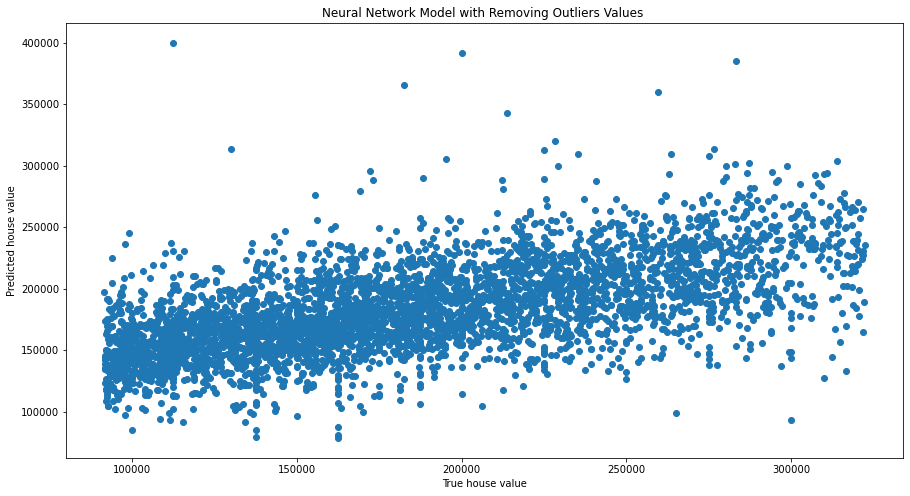

In [38]:
plt.figure(figsize=(15,8 ))
plt.scatter(y_test2.values, y_predict2)
plt.xlabel('True house value')
plt.ylabel('Predicted house value')
plt.title('Neural Network Model with Removing Outliers Values ')

In [39]:
#splitting feature "median_income"'longitude','latitude' to train set , and put "median_house_value" to test set
#df_incomeX = df[['longitude','latitude','median_income']]
df_incomeX = df_outliers[['median_income']]
df_incomeY =df_outliers[['median_house_value']]
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_incomeX,df_incomeY, train_size=0.7)

In [40]:
df_incomeX

,median_income
16,2.9653
25,3.6528
32,6.2558
33,3.3182
34,1.6838
...,...
19991,7.1997
19994,5.5867
19995,1.1790
19996,3.3906


creating the model with four layers 

In [44]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(8, activation='relu', input_shape=(1,)))
model3.add(keras.layers.Dense(8, activation='relu'))
model3.add(keras.layers.Dense(4, activation='relu'))
model3.add(keras.layers.Dense(1))
#optimizer=keras.optimizers.RMSprop(0.001)
model3.compile(optimizer='adam',loss='mean_squared_error',metrics='mean_squared_error')

Fitting three Variables: median_income , longitude , latitude  to the model

In [45]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 8)                 16        
                                                                 
 dense_15 (Dense)            (None, 8)                 72        
                                                                 
 dense_16 (Dense)            (None, 4)                 36        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [46]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model3.fit(X_train3,y_train3,epochs=500,batch_size=20, callbacks=[callback])

Epoch 1/500
491/491 [==============================] - 1s 1ms/step - loss: 37661343744.0000 - mean_squared_error: 37661343744.0000
Epoch 2/500
491/491 [==============================] - 1s 1ms/step - loss: 37562793984.0000 - mean_squared_error: 37562793984.0000
Epoch 3/500
491/491 [==============================] - 1s 1ms/step - loss: 37091454976.0000 - mean_squared_error: 37091454976.0000
Epoch 4/500
491/491 [==============================] - 1s 2ms/step - loss: 35877130240.0000 - mean_squared_error: 35877130240.0000
Epoch 5/500
491/491 [==============================] - 1s 2ms/step - loss: 33610461184.0000 - mean_squared_error: 33610461184.0000
Epoch 6/500
491/491 [==============================] - 1s 1ms/step - loss: 30132727808.0000 - mean_squared_error: 30132727808.0000
Epoch 7/500
491/491 [==============================] - 1s 1ms/step - loss: 25523099648.0000 - mean_squared_error: 25523099648.0000
Epoch 8/500
491/491 [==============================] - 1s 1ms/step - loss: 20150167

491/491 [==============================] - 1s 2ms/step - loss: 2618679040.0000 - mean_squared_error: 2618679040.0000
Epoch 126/500
491/491 [==============================] - 1s 2ms/step - loss: 2617644544.0000 - mean_squared_error: 2617644544.0000
Epoch 127/500
491/491 [==============================] - 1s 1ms/step - loss: 2618384896.0000 - mean_squared_error: 2618384896.0000
Epoch 128/500
491/491 [==============================] - 1s 1ms/step - loss: 2618137344.0000 - mean_squared_error: 2618137344.0000
Epoch 129/500
491/491 [==============================] - 1s 2ms/step - loss: 2618021632.0000 - mean_squared_error: 2618021632.0000


mean squared error score

In [47]:
y_predict3= model3.predict(X_test3)

In [48]:
y_predict3

array([[198584.34],
       [179473.61],
       [185912.05],
       ...,
       [185151.2 ],
       [219805.48],
       [167063.2 ]], dtype=float32)

In [49]:
y_test3.values

array([[271300.],
       [121400.],
       [167600.],
       ...,
       [215300.],
       [220000.],
       [ 92200.]])

Text(0.5, 1.0, 'Neural Network Model using "Income" Column')

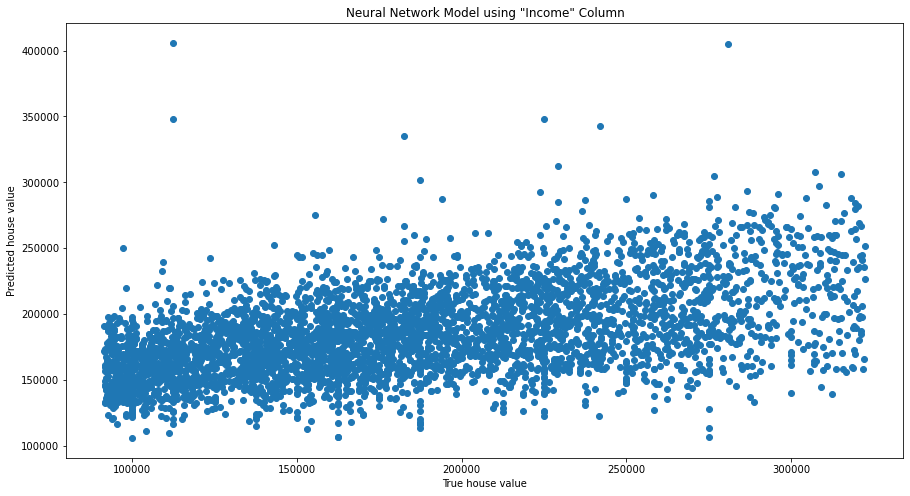

In [53]:
plt.figure(figsize=(15,8 ))
plt.scatter(y_test3.values, y_predict3)
plt.xlabel('True house value')
plt.ylabel('Predicted house value')
plt.title('Neural Network Model using "Income" Column')

### we can save our model by using this code

In [ ]:
#model2.save('Realtech_housing_prise.h5')

In [ ]:
# if you want to load the model use this
#old_model = keras.models.load_model('Realtech_housing_prise.h5')

## this has a beter result but still not that great so we go with LinearRegression


# LinearRegression

LinearRegression for all the data

In [56]:
reg = LinearRegression()
reg.fit(X_train1,y_train1)
reg_predict1= reg.predict(X_test1)
mean_squared_error(y_test1.values, reg_predict1)

4953373520.951479

Text(0.5, 1.0, 'Linear Regression Model Without Removing Outliers Values')

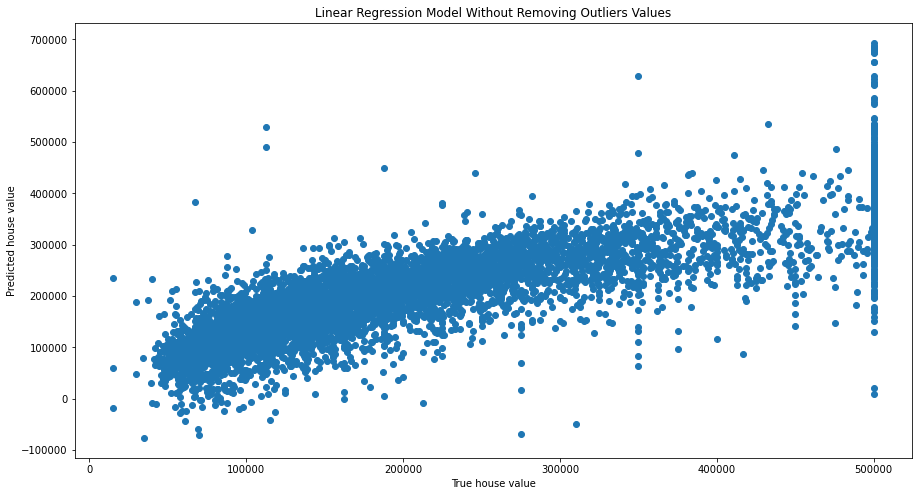

In [58]:
plt.figure(figsize=(15,8 ))
plt.scatter(y_test1.values, reg_predict1)
plt.xlabel('True house value')
plt.ylabel('Predicted house value')
plt.title('Linear Regression Model Without Removing Outliers Values')

LinearRegression for only the median_income

In [59]:

reg2 = LinearRegression()
reg2.fit(X_train3,y_train3)
reg_predict2= reg2.predict(X_test3)
mean_squared_error(y_test3.values,reg_predict2)

2643044982.8131022

Text(0.5, 1.0, 'Linear Regression Model using "income" Column Only')

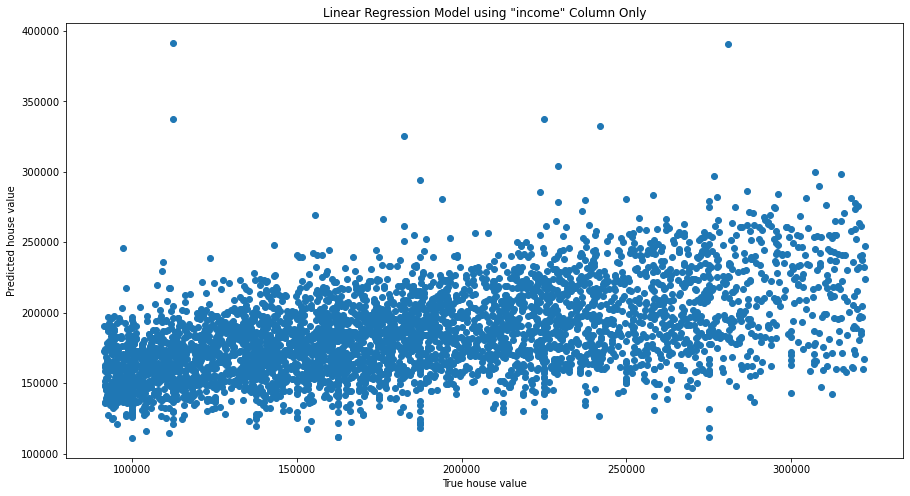

In [60]:
plt.figure(figsize=(15,8 ))
plt.scatter(y_test3.values, reg_predict2)
plt.xlabel('True house value')
plt.ylabel('Predicted house value')
plt.title('Linear Regression Model using "income" Column Only')

LinearRegression for all data after dropping outliers

In [61]:

reg3 = LinearRegression()
reg3.fit(X_train2,y_train2)
reg_predict3= reg3.predict(X_test2)
mean_squared_error(y_test2.values,reg_predict3)

1950226875.577495

Text(0.5, 1.0, 'Linear Regression Model With Removing Outliers Values')

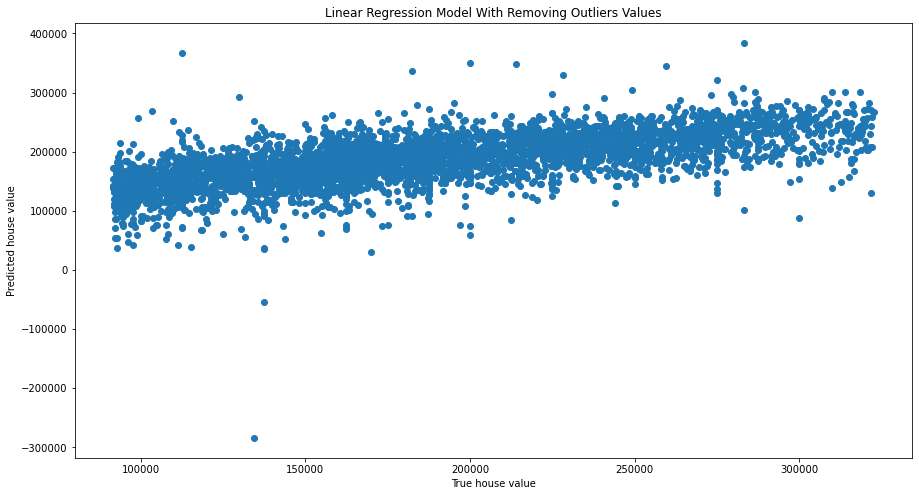

In [62]:
plt.figure(figsize=(15,8 ))
plt.scatter(y_test2.values, reg_predict3)
plt.xlabel('True house value')
plt.ylabel('Predicted house value')
plt.title('Linear Regression Model With Removing Outliers Values')

In [ ]:
# = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Realtech_housing_prise/Realtech_housing_prise.h5')

In [ ]:
#df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Realtech_housing_prise/california_housing_test.csv')

In [ ]:
#o = df_test.drop(columns=['median_house_value'])
#p =df_test[['median_house_value']]